## Exploratory Data Analysis (EDA) for Cybersecurity Intrusion Detection-KDD-Cup-1999

### 1. Data loading and dataset overview

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import presentation as p

with open("../YOUR-DATA-IS-MINE/Data/kddcup_names.csv",'r') as f:
    content = f.read()

### 1.1 Column names and meaning

The KDD Cup 1999 dataset, used for network intrusion detection, contains numerous features (columns) representing different aspects of network traffic. Each column name has a specific meaning related to network connections and behaviors. 

In [197]:
columns_names = []
content = content.split("\n")[1:]
for c in content:
    if len(c) > 1:
        print(c.split(":")[0])
        columns_names.append(c.split(":")[0])
columns_names.append("target")
columns_names[:5]

duration
protocol_type
service
flag
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate


['duration', 'protocol_type', 'service', 'flag', 'src_bytes']

In [198]:
columns_names

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [242]:
attack_types = {
    'normal': 'normal','neptune': 'dos', 'satan': 'probe', 'smurf': 'dos', 'ipsweep': 'probe', 'portsweep': 'probe', 
    'nmap': 'probe', 'guess_passwd': 'r2l', 'back': 'dos', 'mscan': 'probe', 'warezmaster': 'r2l', 'teardrop': 'dos', 
    'warezclient': 'r2l', 'apache2': 'dos', 'processtable': 'dos', 'saint': 'probe', 'snmpguess': 'probe', 
    'mailbomb': 'dos', 'pod': 'dos', 'snmpgetattack': 'dos', 'httptunnel': 'r2l', 'buffer_overflow': 'u2r', 
    'land': 'dos', 'multihop': 'r2l', 'rootkit': 'u2r', 'named': 'r2l', 'ps': 'u2r', 'sendmail': 'r2l', 'imap': 'r2l', 
    'xterm': 'r2l', 'loadmodule': 'u2r', 'ftp_write': 'r2l', 'xlock': 'r2l', 'phf': 'r2l', 'perl': 'u2r', 
    'xsnoop': 'r2l', 'udpstorm': 'dos', 'spy': 'r2l', 'worm': 'r2l', 'sqlattack': 'u2r'
}


In [200]:
training_df =pd.read_csv('../YOUR-DATA-IS-MINE/Data/kddcup.data.corrected.csv', names=columns_names, header=None).drop_duplicates()
testing_df = pd.read_csv('../YOUR-DATA-IS-MINE/Data/corrected.csv', names=columns_names, header=None).drop_duplicates()
complete_df = pd.concat([training_df, testing_df], axis=0).drop_duplicates()

print(f"training dataset dimentions: {training_df.shape}")
print(f"testing dataset dimentions: {testing_df.shape}")
print(f"complete dataset dimentions: {complete_df.shape}")


training dataset dimentions: (1074992, 42)
testing dataset dimentions: (77291, 42)
complete dataset dimentions: (1139070, 42)


In [201]:
training_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal


In [202]:
training_df['Attack Type'] = training_df.target.apply(lambda r:attack_types [r])

In [203]:
training_df['Attack Type'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [204]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1139070 entries, 0 to 310404
Data columns (total 42 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     1139070 non-null  int64  
 1   protocol_type                1139070 non-null  object 
 2   service                      1139070 non-null  object 
 3   flag                         1139070 non-null  object 
 4   src_bytes                    1139070 non-null  int64  
 5   dst_bytes                    1139070 non-null  int64  
 6   land                         1139070 non-null  int64  
 7   wrong_fragment               1139070 non-null  int64  
 8   urgent                       1139070 non-null  int64  
 9   hot                          1139070 non-null  int64  
 10  num_failed_logins            1139070 non-null  int64  
 11  logged_in                    1139070 non-null  int64  
 12  num_compromised              1139070 non-null  i

## Exploratory Data Analysis

In [205]:
training_df.target.unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [206]:
training_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal,normal


In [207]:
training_df.shape

(1074992, 43)

In [208]:
training_df["target"].value_counts()

target
normal             812814
neptune            242149
satan                5019
ipsweep              3723
portsweep            3564
smurf                3007
nmap                 1554
back                  968
teardrop              918
warezclient           893
pod                   206
guess_passwd           53
buffer_overflow        30
warezmaster            20
land                   19
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64

In [209]:
training_df.target.unique().tolist()

['normal',
 'buffer_overflow',
 'loadmodule',
 'perl',
 'neptune',
 'smurf',
 'guess_passwd',
 'pod',
 'teardrop',
 'portsweep',
 'ipsweep',
 'land',
 'ftp_write',
 'back',
 'imap',
 'satan',
 'phf',
 'nmap',
 'multihop',
 'warezmaster',
 'warezclient',
 'spy',
 'rootkit']

In [210]:
training_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [211]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074992 entries, 0 to 4898430
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     1074992 non-null  int64  
 1   protocol_type                1074992 non-null  object 
 2   service                      1074992 non-null  object 
 3   flag                         1074992 non-null  object 
 4   src_bytes                    1074992 non-null  int64  
 5   dst_bytes                    1074992 non-null  int64  
 6   land                         1074992 non-null  int64  
 7   wrong_fragment               1074992 non-null  int64  
 8   urgent                       1074992 non-null  int64  
 9   hot                          1074992 non-null  int64  
 10  num_failed_logins            1074992 non-null  int64  
 11  logged_in                    1074992 non-null  int64  
 12  num_compromised              1074992 non-null  

In [212]:
print('The no of data points are:',training_df.shape[0])
print('='*40)
print('The no of columns are:',training_df.shape[1])
print('='*40)
print('Some of the columns are:',columns_names[:10])

The no of data points are: 1074992
The no of columns are: 43
Some of the columns are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


### Missing values

In [213]:
# Check missing values
droppedna = training_df.dropna() # drop the rows that have at least one element missing
droppedna.shape # Verify the dimension of the data and it is the same as the original dimension

(1074992, 43)

In [214]:
total =training_df.isnull().sum().sort_values(ascending = False)
percent = (training_df.isnull().sum()/training_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,duration,dst_host_srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,...,is_host_login,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,Attack Type
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
training_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [216]:
training_df['Attack Type'].value_counts()

Attack Type
normal    812814
dos       247267
probe      13860
r2l          999
u2r           52
Name: count, dtype: int64

In [217]:
training_df.describe(include=['object'])

,protocol_type,service,flag,target,Attack Type
count,1074992,1074992,1074992,1074992,1074992
unique,3,70,11,23,5
top,tcp,http,SF,normal,normal
freq,978540,580507,786840,812814,812814


In [218]:
columns_names

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

## Categorical Feature distribution 

#### The KDD Cup 1999 dataset file contains a sample of the full dataset and includes several important categorical features. Here is a detailed breakdown of the distributions and explanations 

In [219]:

numeric_columns = training_df._get_numeric_data().columns
categorial_columns = list(set(training_df.columns)-set(numeric_columns))

categorial_columns

['flag', 'target', 'protocol_type', 'Attack Type', 'service']

In [220]:
# lets look into deeply to identify if there are any other binary data exists or not
binary_columns = []
for column_names in numeric_columns:
  if len(training_df[column_names].unique()) <= 2:
      result = []
      s = training_df[column_names].value_counts()
      t = float(len(training_df[column_names]))
      for v in s.index:
          result.append("{}({}%)".format(v,round(100*(s[v]/t),1)))
      print("{} - [{}]".format(column_names, " , ".join(result)))
      binary_columns.append(column_names)

land - [0(100.0%) , 1(0.0%)]
logged_in - [1(63.0%) , 0(37.0%)]
root_shell - [0(100.0%) , 1(0.0%)]
num_outbound_cmds - [0(100.0%)]
is_host_login - [0(100.0%) , 1(0.0%)]
is_guest_login - [0(99.6%) , 1(0.4%)]


In [221]:
# combine all categorical column names
for column_names in binary_columns:
  categorial_columns.append(column_names)
categorial_columns

['flag',
 'target',
 'protocol_type',
 'Attack Type',
 'service',
 'land',
 'logged_in',
 'root_shell',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login']


Note: 'target' column is our prediction and 'Attack Type' is grouped data


1. **protocol_type** :
This feature describes the protocol used in the connection. The main protocols and their distributions in the dataset are:

*tcp* (Transmission Control Protocol): The most commonly used protocol in network communications, used for reliable, ordered, and error-checked delivery of a stream of data.

*udp* (User Datagram Protocol): A simpler message-based connectionless protocol. It is often used in applications where speed is more critical than reliability.

*icmp* (Internet Control Message Protocol): Used for diagnostic or control purposes, such as error messages and network debugging.

In [222]:
training_df.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

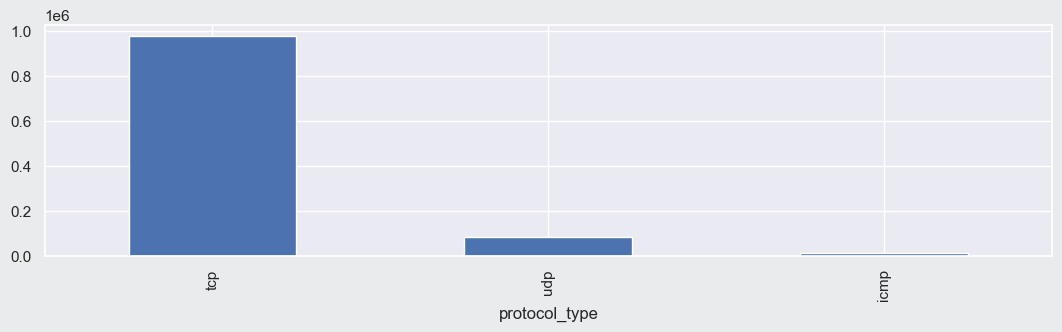

In [223]:
fig = plt.figure()
fig = training_df['protocol_type'].value_counts().plot(figsize=(13, 3), kind="bar")
                                          
plt.show()

2. **service**

This feature identifies the network service on the destination, such as HTTP, FTP, etc. The service feature is quite diverse, with many different possible values. Some common services include:

*http*: The Hypertext Transfer Protocol, used for web traffic.

*smtp*: Simple Mail Transfer Protocol, used for email transmission.

*ftp_data*: File Transfer Protocol, used for transferring files.

*other*: Various other services.

In [224]:
training_df.service.unique()

array(['http', 'smtp', 'domain_u', 'auth', 'finger', 'telnet', 'eco_i',
       'ftp', 'ntp_u', 'ecr_i', 'other', 'urp_i', 'private', 'pop_3',
       'ftp_data', 'netstat', 'daytime', 'ssh', 'echo', 'time', 'name',
       'whois', 'domain', 'mtp', 'gopher', 'remote_job', 'rje', 'ctf',
       'supdup', 'link', 'systat', 'discard', 'X11', 'shell', 'login',
       'imap4', 'nntp', 'uucp', 'pm_dump', 'IRC', 'Z39_50', 'netbios_dgm',
       'ldap', 'sunrpc', 'courier', 'exec', 'bgp', 'csnet_ns', 'http_443',
       'klogin', 'printer', 'netbios_ssn', 'pop_2', 'nnsp', 'efs',
       'hostnames', 'uucp_path', 'sql_net', 'vmnet', 'iso_tsap',
       'netbios_ns', 'kshell', 'urh_i', 'http_2784', 'harvest', 'aol',
       'tftp_u', 'http_8001', 'tim_i', 'red_i'], dtype=object)

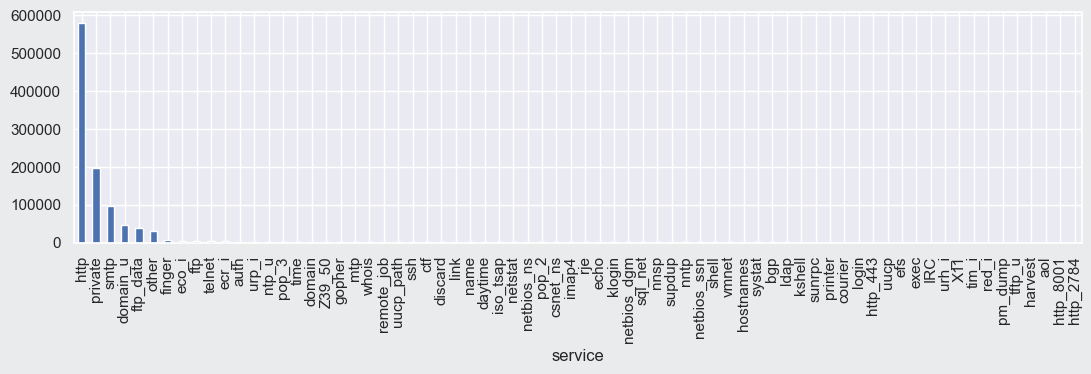

In [225]:
fig = plt.figure()
fig = training_df['service'].value_counts().plot(figsize=(13, 3), kind="bar")
                                          
plt.show()

3. *flag*
This feature indicates the status of the connection. The flag values give information about the state of the connection. Some common flags include:

SF (Successful connection): Connection established and terminated successfully.

S0 (Connection attempt seen, no reply): Connection attempt made but no response received.


REJ (Connection attempt rejected): Connection attempt rejected by the destination.

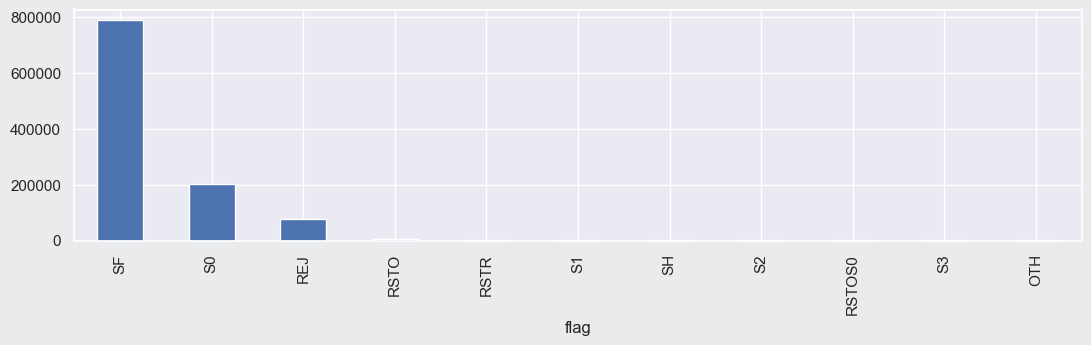

In [226]:
fig = plt.figure()
fig = training_df['flag'].value_counts().plot(figsize=(13, 3), kind="bar")
                                          
plt.show()

In [227]:
training_df.flag.unique()

array(['SF', 'S2', 'S1', 'S3', 'OTH', 'REJ', 'RSTO', 'S0', 'RSTR',
       'RSTOS0', 'SH'], dtype=object)

### Summary
The distributions of the protocol_type, service, and flag features in the KDD Cup 1999 dataset reflect the diversity and typical usage patterns of network traffic, making it a valuable dataset for training and evaluating network intrusion detection systems. The high percentage of tcp connections, the prevalence of http service, and the variety of connection flags provide a comprehensive snapshot of network behavior during the data collection period.

### TARGET FEATURE DISTRIBUTION

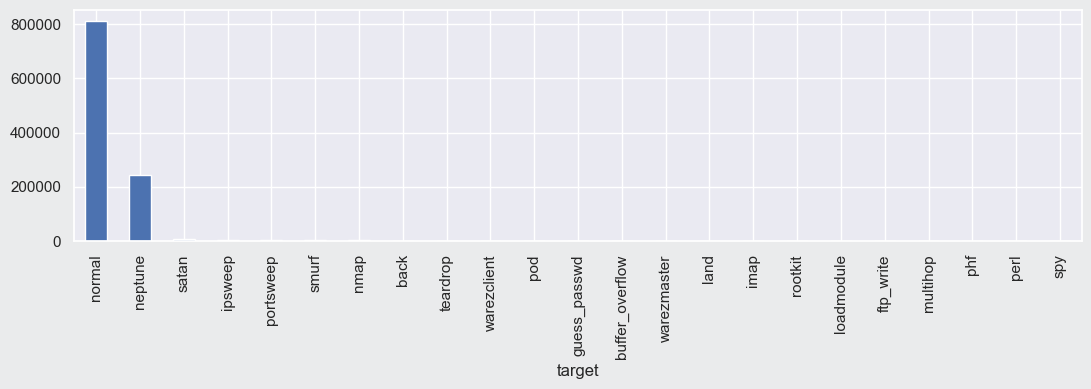

In [228]:
fig = plt.figure()
fig = training_df['target'].value_counts().plot(figsize=(13, 3), kind="bar")
                                          
plt.show()

In [229]:
training_df.target.unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [230]:
print(training_df['target'].describe())
print(training_df['target'].value_counts())

count     1074992
unique         23
top        normal
freq       812814
Name: target, dtype: object
target
normal             812814
neptune            242149
satan                5019
ipsweep              3723
portsweep            3564
smurf                3007
nmap                 1554
back                  968
teardrop              918
warezclient           893
pod                   206
guess_passwd           53
buffer_overflow        30
warezmaster            20
land                   19
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64


## Attack Types

Denial-of-service(DOS) :-
 
A Denial-of-Service (DoS) attack is an attack meant to shut down a machine or network, making it inaccessible to its intended users. DoS attacks accomplish this by flooding the target with traffic, or sending it information that triggers a crash.e.g. syn flood;
 
Remote 2 Local(R2L) attack:- Remote to local attack (r2l) has been widely known to be launched by an attacker to gain unauthorized access to a victim machine in the entire network.
 
User to root attack (U2R) attack:-This attack is usually launched for illegally obtaining the root’s privileges when legally accessing a local machine. , e.g. guessing password, various "buffer overflow" attacks;
 
Probing:-Probing is an attack in which the hacker scans a machine or a. networking device in order to determine weaknesses or. vulnerabilities that may later be exploited so as to. compromise the system. e.g., port scanning.

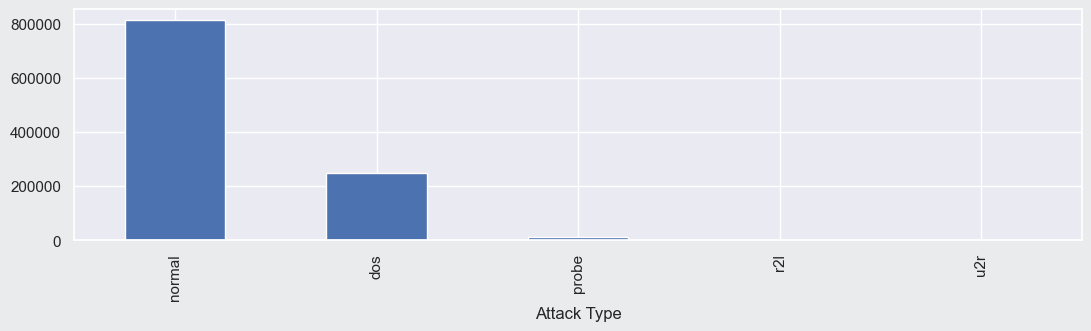

In [231]:
fig = plt.figure()
fig = training_df['Attack Type'].value_counts().plot(figsize=(13, 3), kind="bar")
                                          
plt.show()

In [232]:
training_df['Attack Type'].unique()


array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

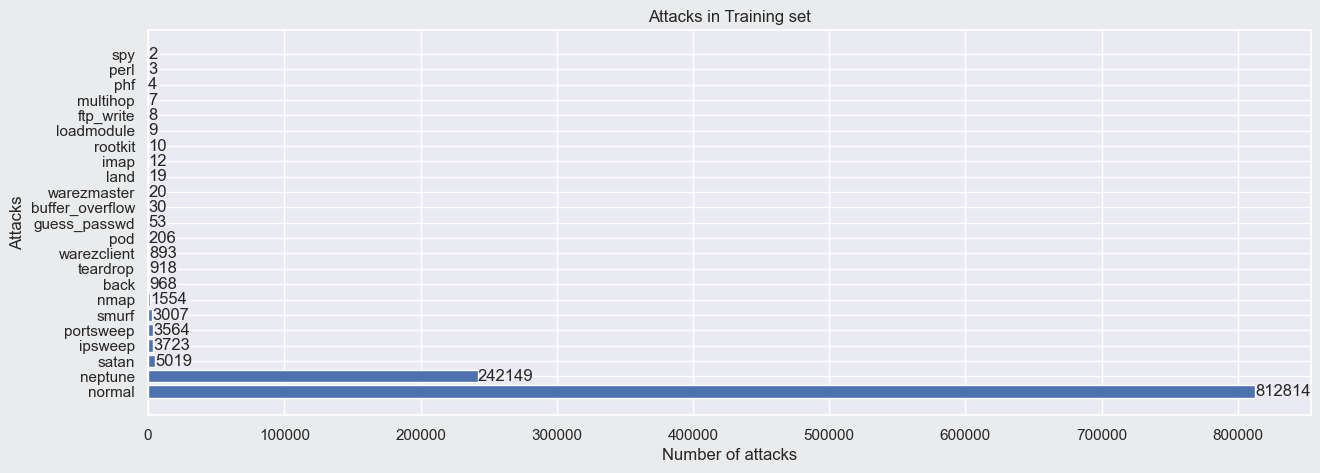

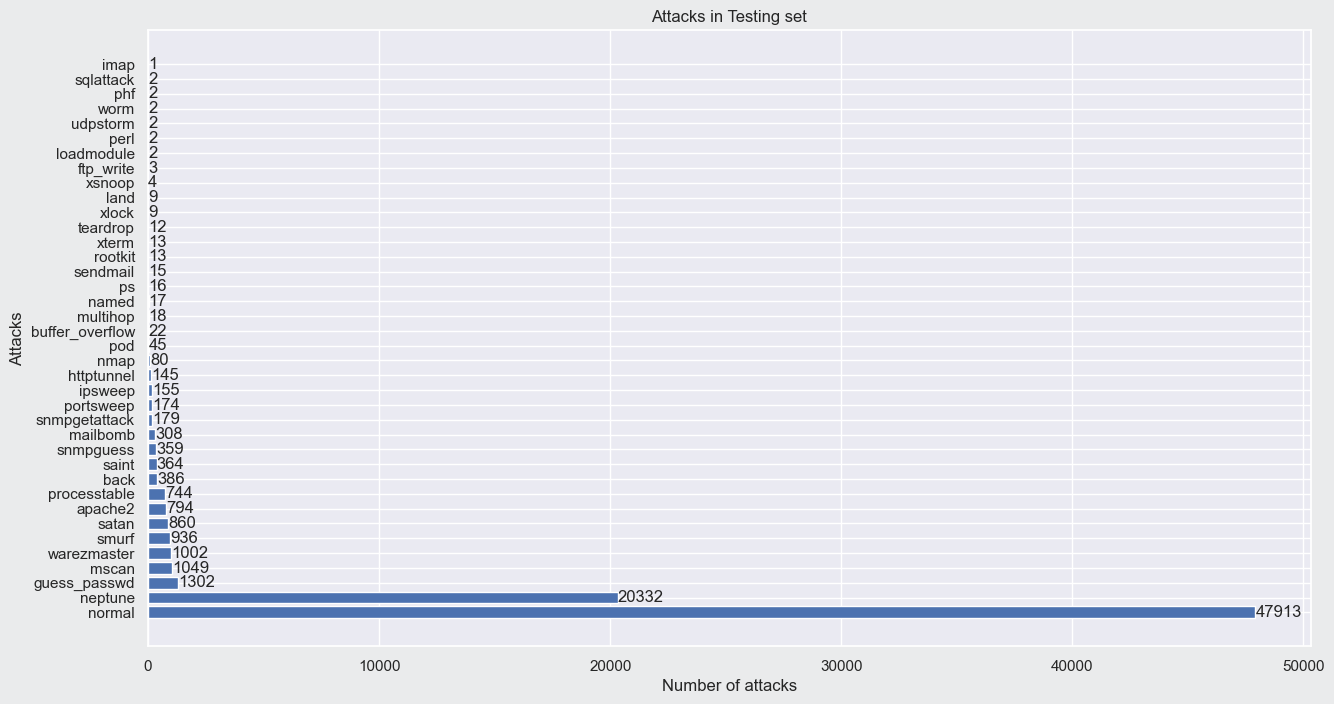

In [233]:
def plot_attacks(dataset, size=(10,10), title=None):
    """
    Plot Horizental Bar chart for the 'target' columns
    
    Keyword arguments:
    dataset - Dataset to plot from 
    size - size of the figure (Defualt=(10,10))
    title - title for the figure (Defualt=None)
    """
    df = pd.DataFrame({'columns_names':dataset["target"]})
    value_counts = df['columns_names'].value_counts()
    dataset = pd.DataFrame({'Category': value_counts.index, 'Count': value_counts.values})

    fig, ax = plt.subplots(figsize=size)
    bars = ax.barh(dataset["Category"], dataset["Count"])
    ax.set_title(title)
    ax.set_xlabel("Number of attacks")
    ax.set_ylabel("Attacks")
    ax.bar_label(bars)
    
plot_attacks(training_df, (15, 5), "Attacks in Training set")
plot_attacks(testing_df, (15, 8), "Attacks in Testing set")


### Numerical Features Exploration

In [234]:
numeric_columns = list(set(numeric_columns)-set(categorial_columns))
numeric_columns

['count',
 'duration',
 'src_bytes',
 'serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_same_src_port_rate',
 'num_file_creations',
 'dst_host_srv_rerror_rate',
 'dst_host_diff_srv_rate',
 'num_root',
 'wrong_fragment',
 'srv_rerror_rate',
 'num_shells',
 'dst_bytes',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'su_attempted',
 'srv_count',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'num_access_files',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'urgent',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'rerror_rate']

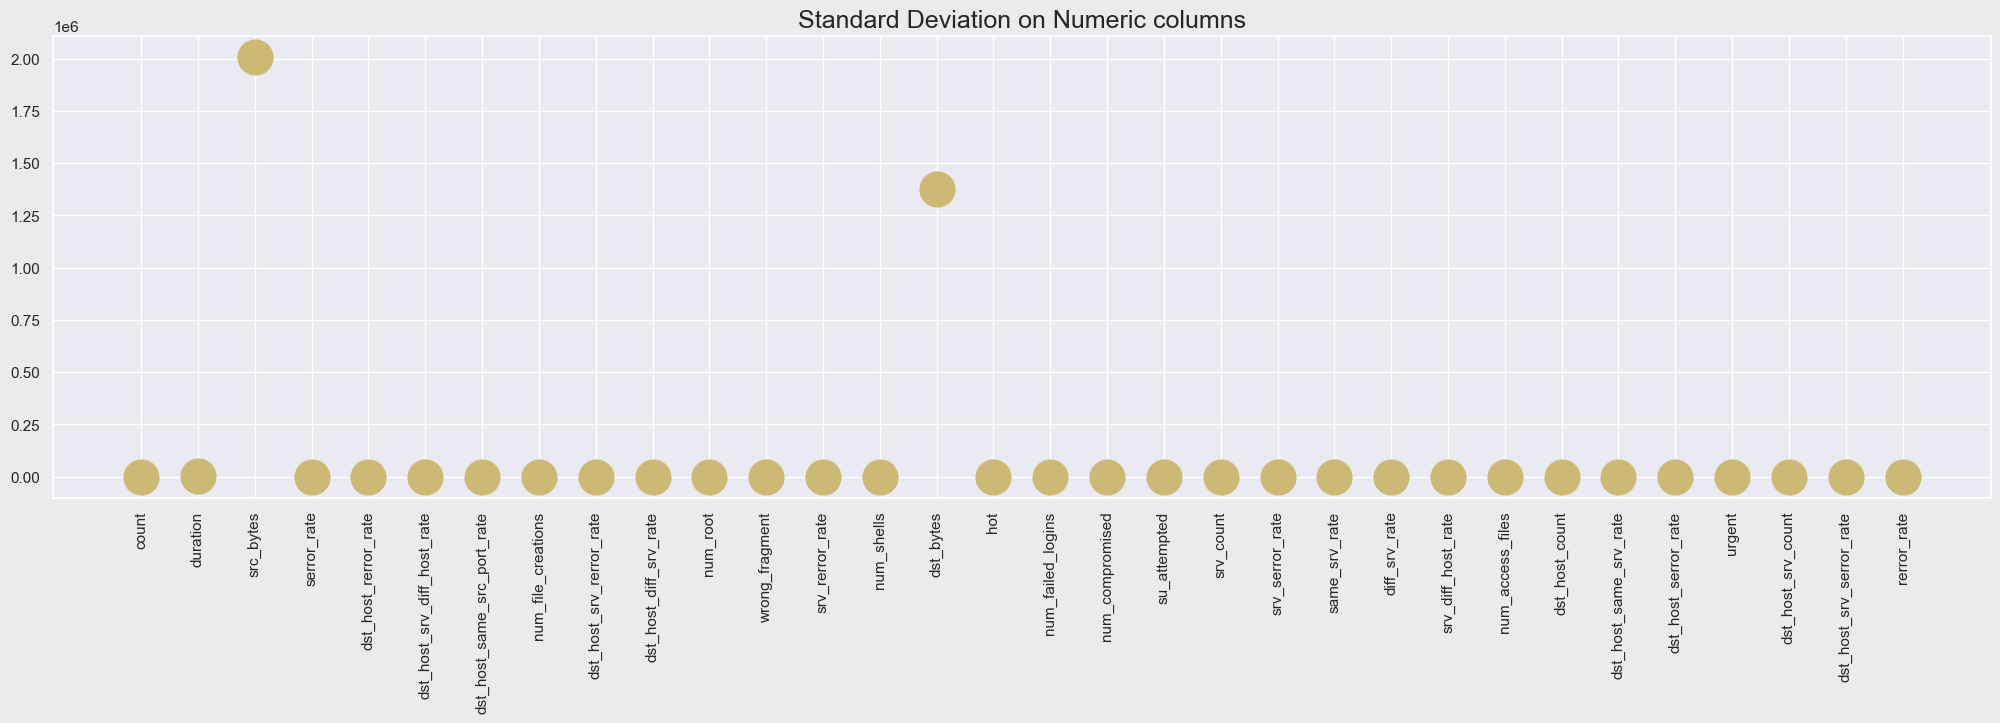

In [235]:
def plot_std_dist(_title):
  df_std = training_df[numeric_columns].std()
  plt.figure(figsize=(25,6))
  plt.plot(list(df_std.index) ,list(df_std.values), 'yo', markersize=25)
  plt.xticks(rotation=90)
  plt.title(_title, fontsize= 18)
  plt.show()

plot_std_dist('Standard Deviation on Numeric columns')

In [257]:

categorial_columns = list(set(training_df.columns)-set(numeric_columns))

categorial_columns

['flag', 'target', 'protocol_type', 'Attack Type', 'service']

In [258]:
def plot_std_dist(_title):
  df_std = training_df[categorial_columns].std()
  plt.figure(figsize=(25,6))
  plt.plot(list(df_std.index) ,list(df_std.values), 'yo', markersize=25)
  plt.xticks(rotation=90)
  plt.title(_title, fontsize= 18)
  plt.show()

## OUTLIERS

In [236]:
# Convert categorical columns to numerical values
categorial_columns 
label_encoders = {}

In [237]:
from scipy.stats import zscore
# Detect outliers using Z-score method
z_scores = np.abs(zscore(training_df.select_dtypes(include=[np.number])))
threshold = 3
outliers_zscore = np.where(z_scores > threshold)
outlier_mask_zscore = (z_scores > threshold).any(axis=1)
print("Number of outliers detected using Z-score method:", outlier_mask_zscore.sum())
training_df_outliers_zscore = training_df[outlier_mask_zscore]

Number of outliers detected using Z-score method: 231154


In [238]:
# Identify outliers
outliers = (z_scores > 3) | (z_scores < -3)
# Summarize outliers by column
outliers_summary = outliers.sum()
print("Number of outliers in each column from total of 267413:")
print(outliers_summary)

Number of outliers in each column from total of 267413:
duration                       11161
src_bytes                         20
dst_bytes                         26
land                              26
wrong_fragment                  1121
urgent                            16
hot                             4137
num_failed_logins                125
logged_in                          0
num_compromised                   79
root_shell                       325
su_attempted                     110
num_root                          81
num_file_creations              2352
num_shells                       359
num_access_files                4305
num_outbound_cmds                  0
is_host_login                      2
is_guest_login                  4088
count                           4890
srv_count                      13562
serror_rate                        0
srv_serror_rate                    0
rerror_rate                    82419
srv_rerror_rate                81784
same_srv_rate      

In [239]:

    # Calculate IQR
Q1 = training_df[numeric_columns].quantile(0.25)
Q3 = training_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((training_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (training_df[numeric_columns] > (Q3 + 1.5 * IQR)))
outliers_summary = outliers.sum()
print("Number of outliers in each column using IQR:")
print(outliers_summary)

Number of outliers in each column using IQR:
count                          235817
duration                        88130
src_bytes                      110163
serror_rate                    213329
dst_host_rerror_rate           126200
dst_host_srv_diff_host_rate     88592
dst_host_same_src_port_rate    176178
num_file_creations               2352
dst_host_srv_rerror_rate       122260
dst_host_diff_srv_rate          50154
num_root                         5670
wrong_fragment                   1121
srv_rerror_rate                 91337
num_shells                        359
dst_bytes                      139112
hot                              6956
num_failed_logins                 125
num_compromised                  1645
su_attempted                      110
srv_count                       55926
srv_serror_rate                215551
same_srv_rate                  268145
diff_srv_rate                  267318
srv_diff_host_rate             158374
num_access_files                 4305
dst_h

In [262]:
# Combine outlier masks from both methods
combined_outlier_mask = outlier_mask_zscore | outliers_summary
print("Number of combined outliers detected:", combined_outlier_mask.sum())
training_df_combined_outliers = training_df[combined_outlier_mask]

# Display combined outliers
training_df_combined_outliers.head()

/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_37126/877538622.py:2: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  combined_outlier_mask = outlier_mask_zscore | outliers_summary


Number of combined outliers detected: 231154


/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_37126/877538622.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  training_df_combined_outliers = training_df[combined_outlier_mask]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,normal,normal
64,0,tcp,http,SF,364,11189,0,0,0,0,...,1.0,0.0,1.0,0.03,0.0,0.0,0.0,0.0,normal,normal
69,0,tcp,http,SF,212,1940,0,0,0,0,...,1.0,0.0,1.0,0.04,0.0,0.0,0.0,0.0,normal,normal
82,0,tcp,http,SF,229,21195,0,0,0,0,...,1.0,0.0,1.0,0.05,0.0,0.0,0.0,0.0,normal,normal
92,0,tcp,http,SF,210,627,0,0,0,0,...,1.0,0.0,1.0,0.05,0.0,0.0,0.0,0.0,normal,normal


In [ ]:
pmap = {'icmp':0,'tcp':1,'udp':2}
training_df['protocol_type'] = training_df['protocol_type'].map(pmap)

In [ ]:

#attack type feature mapping
amap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
training_df['Attack Type'] = training_df['Attack Type'].map(amap)

In [ ]:

#target feature mapping
tmap ={'normal.':0, 'buffer_overflow.':1, 'loadmodule.':2, 'perl.':3, 'neptune.':4,
       'smurf.':5, 'guess_passwd.':6, 'pod.':7, 'teardrop.':8, 'portsweep.':9,
       'ipsweep.':10, 'land.':11, 'ftp_write.':12, 'back.':13, 'imap.':14, 'satan.':15,
       'phf.':16, 'nmap.':17, 'multihop.':18, 'warezmaster.':19, 'warezclient.':20,
       'spy.':21, 'rootkit.':22}
training_df['target'] = training_df['target'].map(tmap)

In [ ]:
training_df.drop('service',axis = 1,inplace= True)

In [ ]:

training_df.shape

(1074992, 42)

In [263]:
# Drop columns with any NaN values
training_df = training_df.dropna(axis=1)

# Keep columns where there are more than 1 unique values
training_df = training_df[[columns_names for columns_names in training_df if training_df[columns_names].nunique() > 1]]

# Calculate the correlation matrix
corr = training_df.corr()

# Plot the heatmap
f, ax1 = plt.subplots(1, 1, figsize=(18, 8))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax1)

plt.show()


ValueError: could not convert string to float: 'tcp'